# VaR (Value at Risk)

## first calcul : On uniform distribution

In [1]:
# calculus 
import numpy as np
from numpy.random import seed
from scipy import stats

In [2]:
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# to have a 'repetable' random number generation
seed(1)

In [4]:
# generate a dataset based on uniform distribution
u = np.random.uniform(low=-80.0, high=20.0, size=1000)

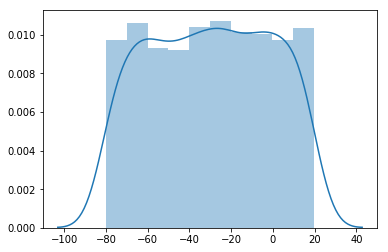

In [5]:
# Visualizing the distribution
sns.distplot(u);

In [6]:
#calcul Var
var_90 = np.quantile(u, 0.9)
var_99 = np.quantile(u, 0.99)
f'VaR 90 : {var_90} - VaR 99 : {var_99}'

'VaR 90 : 10.174427825861457 - VaR 99 : 18.88658785790961'

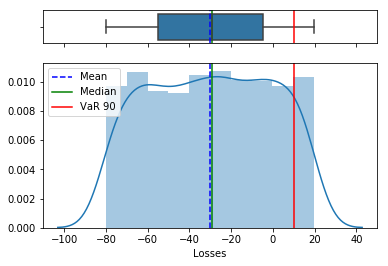

In [7]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=u.mean()
median=np.median(u, axis=0)

sns.boxplot(u, ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(var_90, color='r', linestyle='-')

sns.distplot(u, ax=ax_hist)

ax_hist.axvline(mean, color='b', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(var_90, color='r', linestyle='-')

plt.xlabel('Losses in Millions EUROS')

plt.legend({'Mean':mean,'Median':median,'VaR 90':var_90})

ax_box.set(xlabel='')
plt.show()

## On normal distribution